In [78]:
from qiskit import *
import numpy as np
from qiskit.circuit.library import MCXGate
from qiskit.primitives import *

In my case, i'm gonna use the ansatz to represent the index of X and Y

And also encode the coefficients on the active space.

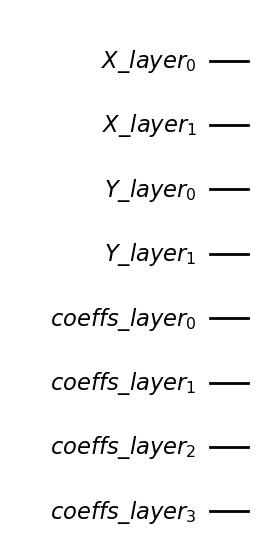

In [68]:
X_index = QuantumRegister(2,name='X_layer')
Y_index = QuantumRegister(2,name='Y_layer')
coeffs = QuantumRegister(4,name='coeffs_layer')

qc = QuantumCircuit(X_index,Y_index,coeffs)
qc.draw('mpl')


Let's start

the input data is 

| 9 | 15 | 3            |4              |
|---|---|---|---|
| 12 | 3  | 4 |5 |
| 7 | 9  | 2 | 7  |
| 12 | 11  | 1| 2  |


In [69]:
inputs = np.array([[9,15,3,4],[12,3,4,5],[7,8,2,7],[12,11,1,2]])

print("Input data :\n",inputs)

Input data :
 [[ 9 15  3  4]
 [12  3  4  5]
 [ 7  8  2  7]
 [12 11  1  2]]


In [70]:
def reverse_str(str_):
    res = ''
    for i in range(len(str_)):
        res = res + str_[-i-1]
    return res

In [71]:
def data_in_bit(inputs):
    res = []
    for i in inputs:
        temp = []
        for j in i:
            binary = format(j,'b').zfill(4)
            binary = reverse_str(binary)
            temp.append(binary)
        res.append(temp)
    return np.array(res)
            

In [72]:
## Change the data into binary form
binary_inputs = data_in_bit(inputs)
print(binary_inputs)

[['1001' '1111' '1100' '0010']
 ['0011' '1100' '0010' '1010']
 ['1110' '0001' '0100' '1110']
 ['0011' '1101' '1000' '0100']]


In [109]:
X_index = QuantumRegister(2,name='X_layer')
Y_index = QuantumRegister(2,name='Y_layer')
coeffs = QuantumRegister(4,name='coeffs_layer')

qc = QuantumCircuit(X_index,Y_index,coeffs)
qc.draw('mpl')

for i in range(2):
    qc.h(X_index[i])
for i in range(2):
    qc.h(Y_index[i])

for i in range(4):
    for j in range(4):
        X_idx = format(i,'b').zfill(2)
        Y_idx = format(j,'b').zfill(2)
        coeff = binary_inputs[i][j]
        gate = MCXGate(4,ctrl_state=X_idx+Y_idx)
        for index,k in enumerate(coeff):
            if k == '1':
                qc.append(gate,X_index[:]+Y_index[:]+[coeffs[index]])
        qc.barrier()
qc.measure_all()
            

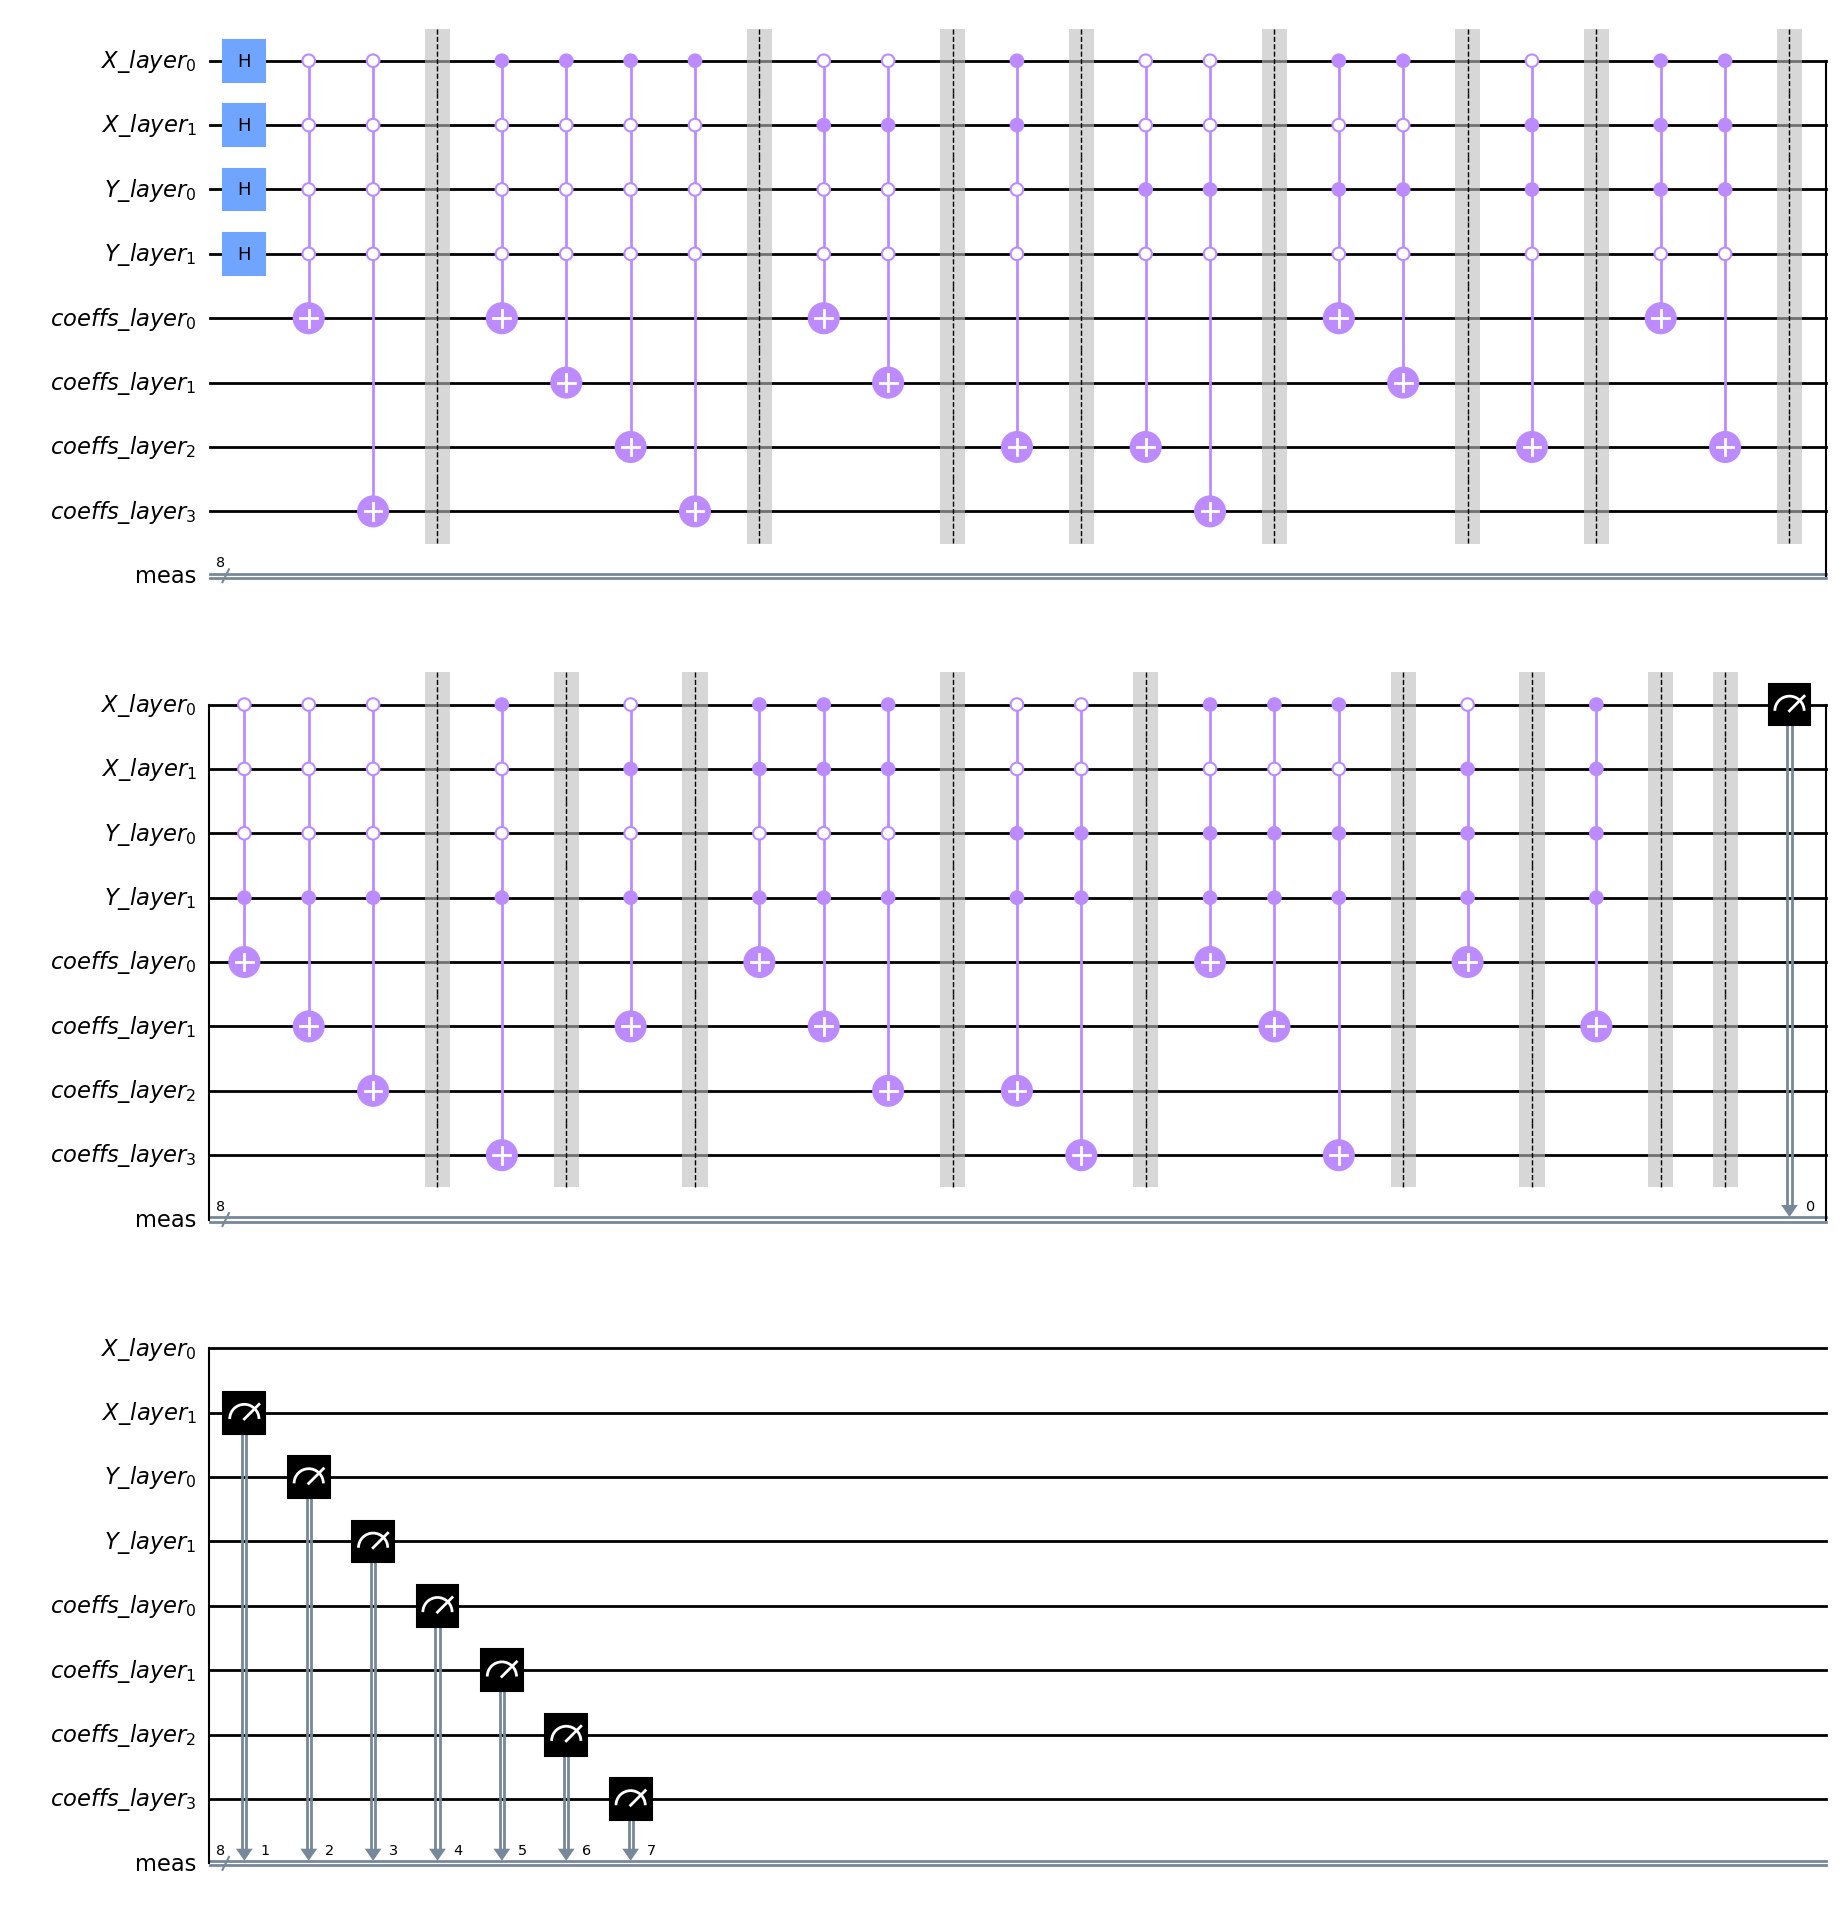

In [110]:
qc.draw('mpl')

In [111]:
sampler = Sampler()

result = sampler.run(qc).result().quasi_dists[0]
binary_dict = {}

for i in result.keys():
    binary_dict[format(i,'b').zfill(8)] = result[i]

print(binary_dict)

{'00011110': 0.0625, '00101010': 0.0625, '00101111': 0.0625, '00110010': 0.0625, '00110101': 0.0625, '01000011': 0.0625, '01000110': 0.0625, '01010111': 0.0625, '01111000': 0.0625, '01111011': 0.0625, '10001001': 0.0625, '10010000': 0.0625, '10111101': 0.0625, '11000100': 0.0625, '11001100': 0.0625, '11110001': 0.0625}


In [112]:
## From this result we can re construct the input
decoded_result = []
for i in range(4):
    temp = []
    for j in range(4):
        X_idx = format(i,'b').zfill(2)
        Y_idx = format(j,'b').zfill(2)
        key = X_idx+Y_idx
        
        for k in binary_dict.keys():
            if k[4:] == key:
                temp.append(int(k[:4],2))
    decoded_result.append(temp)        
decoded_result = np.array(decoded_result)
print('Decoded result :\n',decoded_result) 
print('\n')
print('initial input :\n', inputs)        

Decoded result :
 [[ 9 15  3  4]
 [12  3  4  5]
 [ 7  8  2  7]
 [12 11  1  2]]


initial input :
 [[ 9 15  3  4]
 [12  3  4  5]
 [ 7  8  2  7]
 [12 11  1  2]]


# This layer have many interesting features

1. The result is quite good even if in small measure

2. It is easy to add channels

In [105]:
## Convolusion (Channel : 4)

X_index = QuantumRegister(2,name='X_layer')
Y_index = QuantumRegister(2,name='Y_layer')
coeffs = QuantumRegister(4,name='coeffs_layer')

qc = QuantumCircuit(X_index,Y_index,coeffs)
qc.draw('mpl')

for i in range(2):
    qc.h(X_index[i])
for i in range(2):
    qc.h(Y_index[i])
qc.h(4)
qc.h(5)
for i in range(4):
    for j in range(4):
        X_idx = format(i,'b').zfill(2)
        Y_idx = format(j,'b').zfill(2)
        coeff = binary_inputs[i][j]
        gate = MCXGate(4,ctrl_state=X_idx+Y_idx)
        for index,k in enumerate(coeff):
            if k == '1':
                qc.append(gate,X_index[:]+Y_index[:]+[coeffs[index]])
        qc.barrier()
qc.measure_all()
            

In [106]:
sampler = Sampler()

result = sampler.run(qc).result().quasi_dists[0]
binary_dict = {}

for i in result.keys():
    binary_dict[format(i,'b').zfill(8)] = result[i]

print(binary_dict)

{'00000010': 0.015625, '00000101': 0.015625, '00001010': 0.015625, '00001110': 0.015625, '00001111': 0.015625, '00010010': 0.015625, '00010101': 0.015625, '00011010': 0.015625, '00011110': 0.015625, '00011111': 0.015625, '00100010': 0.015625, '00100101': 0.015625, '00101010': 0.015625, '00101110': 0.015625, '00101111': 0.015625, '00110010': 0.015625, '00110101': 0.015625, '00111010': 0.015625, '00111110': 0.015625, '00111111': 0.015625, '01000011': 0.015625, '01000110': 0.015625, '01000111': 0.015625, '01001000': 0.015625, '01001011': 0.015625, '01010011': 0.015625, '01010110': 0.015625, '01010111': 0.015625, '01011000': 0.015625, '01011011': 0.015625, '01100011': 0.015625, '01100110': 0.015625, '01100111': 0.015625, '01101000': 0.015625, '01101011': 0.015625, '01110011': 0.015625, '01110110': 0.015625, '01110111': 0.015625, '01111000': 0.015625, '01111011': 0.015625, '10000000': 0.015625, '10001001': 0.015625, '10001101': 0.015625, '10010000': 0.015625, '10011001': 0.015625, '10011101

In [107]:
decoded_result = []
for i in range(4):
    temp = []
    for j in range(4):
        X_idx = format(i,'b').zfill(2)
        Y_idx = format(j,'b').zfill(2)
        key = X_idx+Y_idx
        
        for k in binary_dict.keys():
            if k[4:] == key:
                temp.append(int(k[:4],2))
    decoded_result.append(temp)        
decoded_result = np.array(decoded_result)
decoded_result=decoded_result.reshape(-1,4,4)
print('Decoded result :\n',decoded_result) 
print('\n')
print('initial input :\n', inputs) 

Decoded result :
 [[[ 8  9 10 11]
  [12 13 14 15]
  [ 0  1  2  3]
  [ 4  5  6  7]]

 [[12 13 14 15]
  [ 0  1  2  3]
  [ 4  5  6  7]
  [ 4  5  6  7]]

 [[ 4  5  6  7]
  [ 8  9 10 11]
  [ 0  1  2  3]
  [ 4  5  6  7]]

 [[12 13 14 15]
  [ 8  9 10 11]
  [ 0  1  2  3]
  [ 0  1  2  3]]]


initial input :
 [[ 9 15  3  4]
 [12  3  4  5]
 [ 7  8  2  7]
 [12 11  1  2]]
